In [104]:
import sys
sys.path.append('code/')

import pandas as pd
import MODA
import matplotlib
import seaborn

%matplotlib inline

In [105]:
m = MODA.StaticData()
PLUTO = m.GetPLUTO('../../static_data_local/nyc_pluto_16v2/')

 Static Data is pulled from //Chgoldfs01/FCTF/DATA DATA DATA/ by default.
reading .csv file: BK
277131 rows in BK
reading .csv file: BX
89830 rows in BX
reading .csv file: Mn
42958 rows in Mn
reading .csv file: QN
324403 rows in QN
reading .csv file: SI
124048 rows in SI
858370 rows in total PLUTO data


In [111]:
PLUTO.reset_index(inplace=True, drop = True)
PLUTO.BBL = PLUTO.BBL.astype(str)
PLUTO.BldgClass = PLUTO.BldgClass.astype(str)

In [107]:
PLUTO.to_csv('PLUTO_processed.csv')

In [112]:
PLUTO['BUILDING_CAT'] = PLUTO.BldgClass.apply(lambda x: x[0])

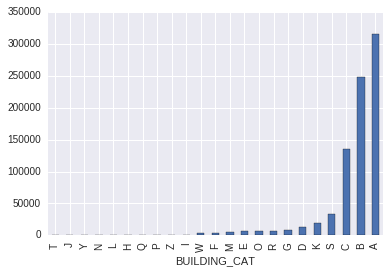

In [155]:
PLUTO.groupby('BUILDING_CAT')['BBL'].count().sort_values().plot(kind = 'bar')

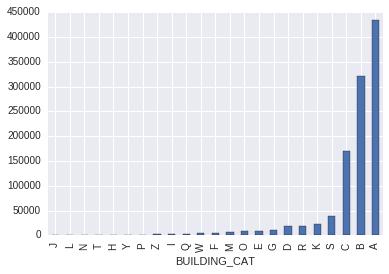

In [153]:
PLUTO.groupby('BUILDING_CAT')['NumBldgs'].sum().sort_values().plot(kind = 'bar')

In [131]:

PLUTO = PLUTO[PLUTO.YearBuilt >= 1500]
PLUTO[PLUTO.YearBuilt == PLUTO.YearBuilt.min()]

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,BUILDING_CAT
528607,QN,5013,6,407,865.0,2001.0,25.0,20.0,11354.0,E273,...,10a,NaN,411 026,42502.0,NaN,0.0,NaN,1,16V2,Q


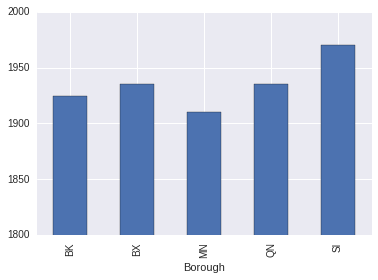

In [132]:
age = PLUTO.groupby('Borough')['YearBuilt'].median().plot(kind = 'bar')
age = age.set_ylim(1800,2000)

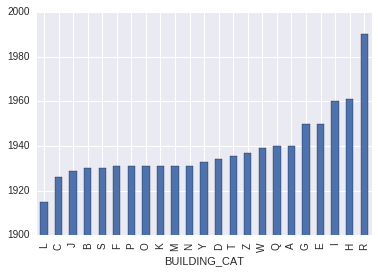

In [139]:
age = PLUTO.groupby('BUILDING_CAT')['YearBuilt'].median().sort_values().plot(kind = 'bar')
age = age.set_ylim(1900,2000)

In [38]:
PLUTO[PLUTO.NumFloors == PLUTO.NumFloors.max()]

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
82345,BK,3172,8,304,425.0,2004.0,32.0,34.0,11206.0,E218,...,194036.0,13b,NaN,309 010,31102.0,NaN,3.031720e+09,10/2/2008,1,16V2


## A real-world example: Broadband Internet Access

MODA and the CTO's office collaborated to study the state of internet access for New Yorkers:

* [Many New Yorkers cannot afford broadband internet today](https://moda-nyc.carto.com/viz/1234cd1a-1fb0-11e7-ab3c-0e05a8b3e3d7/public_map)

* Public Wifi is still sparsely accessibly outside of Manhatten (LINK)

In [71]:
City_Owned = PLUTO[PLUTO.OwnerType == 'C']

Tallest_Facilities = City_Owned.ix[City_Owned.groupby('ZipCode').NumFloors.idxmax()]



In [73]:
geoID = 'fb9ad04a'
geoKey = '051f93e4125df4bae4f7c57517e62344'

f = MODA.GeoHelper(geoID,geoKey)
Tallest_Facilities = f.GetLatLong(Tallest_Facilities)

found ID column: BBL


In [103]:
import folium

my_map = folium.Map(location=[40.7128 , -74.0059],tiles='Stamen Toner')

Tallest_Facilities.apply(lambda x: folium.CircleMarker(location = [x['Latitude'], x['Longitude']]\
                                                 ,popup  = x['Address'], radius = 100).add_to(my_map) , axis = 1)

my_map